# 응용통계학 과제 : ZIP 
## <div style="text-align: right"> 201822037 한민주 </div>

## Packages

In [10]:
library(tidyverse)
library(gridExtra)
library(pscl)

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



## 데이터 불러오기 : fish

In [1]:
fish = read.csv("fish2.csv")

In [5]:
fish %>% glimpse

Rows: 250
Columns: 5
$ camper  <int> 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,~
$ persons <int> 1, 1, 1, 2, 1, 4, 3, 4, 3, 1, 4, 3, 3, 3, 1, 1, 4, 3, 2, 3, 4,~
$ child   <int> 0, 0, 0, 1, 0, 2, 1, 3, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1,~
$ count   <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1,~
$ LOS     <dbl> 3.0, 3.0, 3.0, 3.0, 3.4, 3.0, 3.0, 3.0, 3.0, 3.1, 3.0, 3.0, 3.~


|변수 |설명 |
|---|---|
| count | 잡은 물고기 수 | 
|child | 그룹 당 아이들의 수|
|persons | 그룹 당 사람 수 |
|camper | 공원에서 야영 여부 |
|LOS | 공원에서 체류 시간|

## 탐색적 자료 분석

In [16]:
count.table = tally(group_by(fish , count)) %>% mutate(prop = n/sum(n))
count.table

print(fish %>% summarise(lambda = mean(count) , max = max(count)))

count,n,prop
<int>,<int>,<dbl>
0,142,0.568
1,31,0.124
2,20,0.080
3,12,0.048
4,6,0.024
5,10,0.040
6,4,0.016
7,3,0.012
8,2,0.008


  lambda max
1  3.296 149


- 물고기를 한 마리도 잡지 못한 그룹이 56.8%임
- `count`의 평균은 3.296 , 최대값은 149

In [19]:
persons.table = tally(group_by(fish , persons)) %>% mutate(prop = n/sum(n))
persons.table

persons,n,prop
<int>,<int>,<dbl>
1,57,0.228
2,70,0.280
3,57,0.228
4,66,0.264


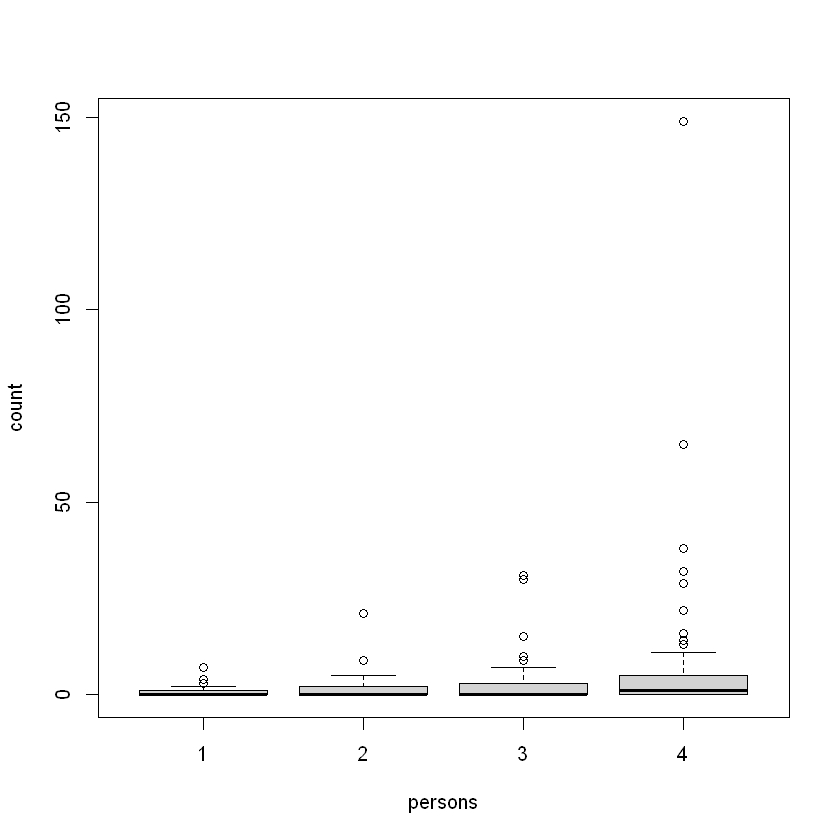

In [62]:
boxplot(count~persons , data = fish)

- 그룹 당 사람 수는 1~4명까지 각각 비슷한 비율로 구성되어있음.
- 그룹 당 사람 수(persons)에 따른 잡은 물고기 수(count)를 보니 그룹 당 사람 수가 많아질수록 박스의 길이가 길어지는 것처럼 보임

In [21]:
child.table = tally(group_by(fish , child)) %>% mutate(prop = n/sum(n))
child.table

child,n,prop
<int>,<int>,<dbl>
0,132,0.528
1,75,0.300
2,33,0.132
3,10,0.040


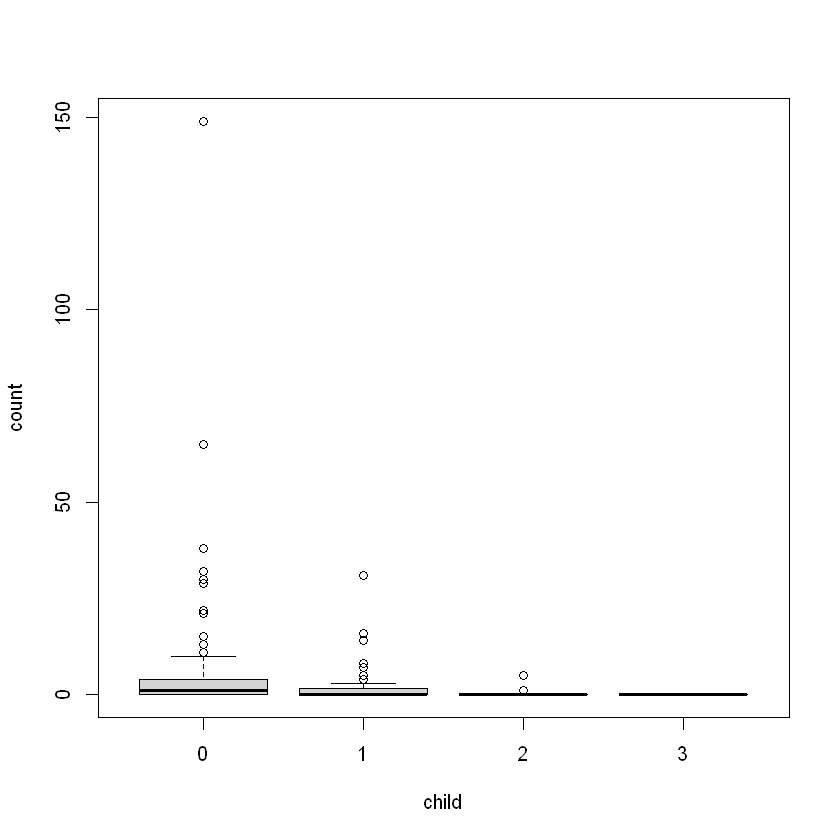

In [63]:
boxplot(count~child , data = fish)

- 아이가 없는 그룹이 52.8%
- 그룹 당 아이의 수(child)에 따른 잡은 물고기 수(count)를 보니 아이가 적을수록 박스의 길이가 길어지는 것처럼 보임

In [22]:
camper.table = tally(group_by(fish , camper)) %>% mutate(prop = n/sum(n))
camper.table

camper,n,prop
<int>,<int>,<dbl>
0,103,0.412
1,147,0.588


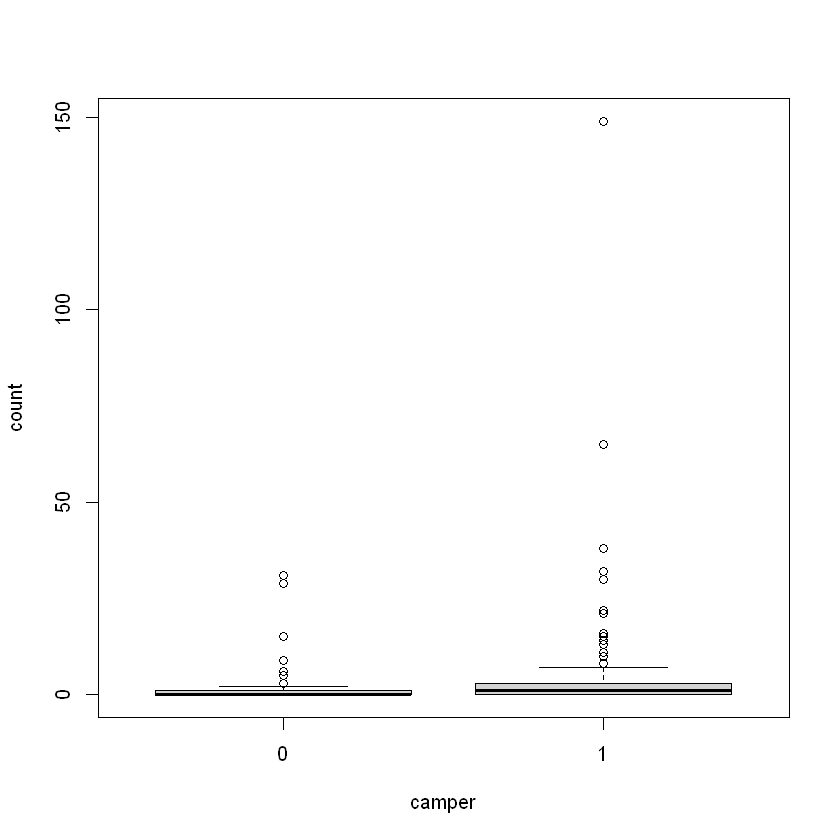

In [61]:
boxplot(count~camper , data = fish)

- 공원에서 야영을 한 그룹, 58.8% , 공원에서 야영을 하지 않은 그룹 41.2%
- 공원에서 야영 여부(camper)에 따른 잡은 물고기 수(count)를 보니 상자의 크기와 중앙값의 차이는 크지 않아 보이나, 야영을 한 그룹에 이상치가 존재함.

In [26]:
summary(fish$LOS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   3.000   4.266   3.900  29.400 

In [51]:
cor(fish$count , fish$LOS)

[1] 0.7860501

- 공원에 머무른 시간은 3시간이 최소 , 29.4시간이 최대
- 평균 4.26시간 공원에 머무름
- 잡은 물고기 수(count)와 공원 체류 시간(LOS) 사이 상관성이 있어보임

### 이상치 제거

In [69]:
fish = fish[fish$count != max(fish),]

- 잡은 물고기 수가 149 마리인 그룹은 이상치같으므로 제거함.

### Zero-Inflated(0과잉)인지 확인

In [80]:
count.table = tally(group_by(fish , count)) %>% mutate(prop = n/sum(n))

## 데이터의 잡은 물고기 수에 따른 관측 비율 그림
plot1 = count.table %>% 
    ggplot(aes(y = prop , x=count)) +
    geom_bar(stat = "identity") + 
    labs(x= "Number of count" , y = "Proportion")+
    ggtitle("a) Observed") +
    coord_cartesian(ylim = c(0, .6))

#### Poission model

In [81]:
possible.values <- 0:max(fish$count)
model.prob <- dpois(possible.values,mean(fish$count))
pois.model <- data.frame(possible.values,model.prob)

plot2 = ggplot(pois.model,aes(y=model.prob,x=possible.values)) + 
  geom_bar(stat="identity") +
  labs(x= "Number of drinks", y="Probability") +
  ggtitle("b) Poisson Model") +
  coord_cartesian(ylim = c(0, .6))

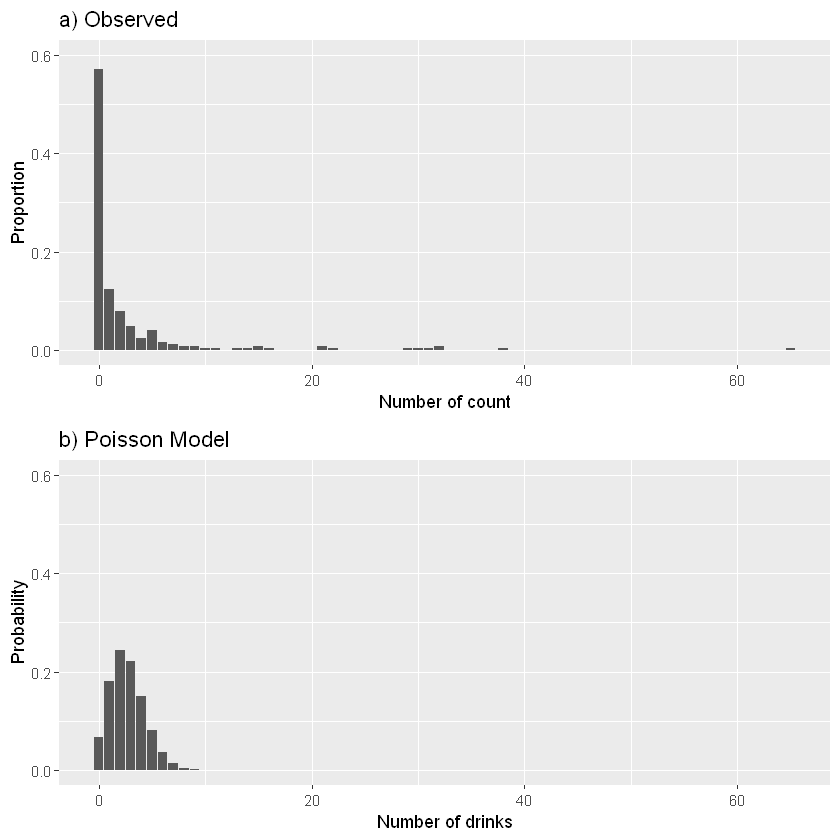

In [82]:
grid.arrange(plot1,plot2)

- 0이 너무 많음.
- 낚시를 하지 않은 그룹도 0으로 응답.

## 잡은 물고기 수 예측 (포아송)

### Model1 : Poisson model

#### $$log(\lambda) = \beta_0 + \beta_1 (persons) + \beta_2 (child) + \beta_3 (LOS)$$

In [336]:
model1 = glm(count ~ persons + child + LOS , family =poisson , data= fish)

In [337]:
summary(model1)


Call:
glm(formula = count ~ persons + child + LOS, family = poisson, 
    data = fish)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4745  -1.4292  -1.1235  -0.0532  10.9562  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.858586   0.132818  -6.464 1.02e-10 ***
persons      0.641839   0.046550  13.788  < 2e-16 ***
child       -1.123182   0.085459 -13.143  < 2e-16 ***
LOS          0.079255   0.004606  17.208  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2086.47  on 248  degrees of freedom
Residual deviance:  836.56  on 245  degrees of freedom
AIC: 1174.8

Number of Fisher Scoring iterations: 6


**회귀계수**

In [139]:
exp(coef(model1))

(Intercept)     persons       child         LOS 
  0.4237609   1.8999715   0.3252432   1.0824800

- 세 변수(persons , child ,LOS) 모두 유의
- 그룹 당 사람 수가 한 명 증가할 때, 잡은 물고기 수가 약 1.9배 
- 그룹 당 아이 수가 한 명 증가할 때, 잡은 물고기 수가 약 0.325배
- 그룹 당 공원 체류 시간이 한 단위 증가할 때, 잡은 물고기 수가 1.08배

**Goodness of fit test**

In [140]:
model1$deviance ; model1$df.residual

[1] 836.5615

[1] 245

In [141]:
1-pchisq(model1$deviance , model1$df.residual)

[1] 0

- residual deviance : 836.5 , 자유도 : 245
- $\chi^2$ 검정 결과 유의확률 < 0.001 -> 영가설 기각
- 적합도 검정에서 적합결여(모형이 충분히 적합x)

### ZIP 모형 적합

In [338]:
model2 = zeroinfl(count~ persons+ child + LOS | camper, data = fish )

In [339]:
summary(model2)


Call:
zeroinfl(formula = count ~ persons + child + LOS | camper, data = fish)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.9659 -0.7231 -0.5833  0.1429 13.6725 

Count model coefficients (poisson with log link):
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.125897   0.153871   0.818    0.413    
persons      0.407477   0.051313   7.941 2.00e-15 ***
child       -0.606615   0.118488  -5.120 3.06e-07 ***
LOS          0.075378   0.004681  16.104  < 2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.5210     0.2284   2.281  0.02253 * 
camper       -0.8546     0.2999  -2.850  0.00437 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 11 
Log-likelihood: -510.7 on 6 Df

In [340]:
exp(coef(model2))

count_(Intercept)     count_persons       count_child         count_LOS 
        1.1341653         1.5030203         0.5451934         1.0782918 
 zero_(Intercept)       zero_camper 
        1.6837811         0.4254579

**part1 : Count model coefficients**
- 모든 회귀계수(persons , child , LOS)가 유의
- 낚시를 한 그룹의 경우 평균 잡은 물고기 수는 사람이 한 명 증가할 때 1.5배
- 낚시를 한 그룹의 경우 평균 잡은 물고기 수는 아이가 한 명 증가할 때 0.54배
- 낚시를 한 그룹의 경우 평균 잡은 물고기 수는 체류 시간이 한 단위 증가할 때 1.07배

**part2 : Zero - inflation model coefficients** (낚시를 하지 않은 비율 예측)

#### $$log(\frac{\alpha}{1-\alpha}) = \gamma_0  + \gamma_1(camper)$$

In [341]:
exp(0.5210) / (1+exp(0.5210)) ## 야영 X , 낚시 x

[1] 0.6273816

In [342]:
1- exp(0.5210) / (1+exp(0.5210)) ## 야영 o , 낚시 x

[1] 0.3726184

- 회귀계수(camper)가 유의 
- 낚시를 안 한 그룹이 야영한 오즈는 낚시를 안 한 그룹이 야영 안 한 오즈의 0.425배
- 야영을 한 그룹이 낚시를 안 할 확률 = 0.37 (37.2%)
- 야영을 안 한 그룹이 낚시를 안 할 확률 = 0.627 (62.7%)

### 포아송모델(model1)과 ZIP모델(model2) 비교

In [343]:
vuong(model1 , model2)

Vuong Non-Nested Hypothesis Test-Statistic: 
(test-statistic is asymptotically distributed N(0,1) under the
 null that the models are indistinguishible)
-------------------------------------------------------------
              Vuong z-statistic             H_A   p-value
Raw                   -2.509247 model2 > model1 0.0060494
AIC-corrected         -2.440193 model2 > model1 0.0073397
BIC-corrected         -2.318747 model2 > model1 0.0102044


- model1 : 포아송 모형 , model2 : ZIP 모형
- 두 모형이 다르지 않은 경우 Voung의 검정 통계량은 근사적으로 N(0,1)
- ZIP 모형이 더 나은 모형임 (Z = -2.509247 , p-value = 0.006)

### **최종 모형을 그래프로 표현**

In [344]:
model2$coefficients

$count
(Intercept)     persons       child         LOS 
 0.12589695  0.40747662 -0.60661466  0.07537811 

$zero
(Intercept)      camper 
  0.5210419  -0.8545892

In [346]:
group = (0.521041894656969 -0.521041894656969*fish$camper > 0.5)  %>% as.factor

In [350]:
(0.521041894656969 -0.521041894656969*fish$camper > 0.5)

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE
 [49] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [61]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
 [73]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [85] FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
 [97]  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[109] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[121]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE
[133] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE
[145]  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
[157] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
[169] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[181]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[193]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[217]  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
[229] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE

- camper를 설명변수로 한 logit모형에서 낚시를 안 한 그룹은 잡은 물고기 수가 0이 되도록 조정

In [347]:
fitted = model2$fitted.values

for (i in 1:length(fitted)){ 
    if(group[i]==TRUE){
        fitted[i]=0}
    else{
    fitted[i]=fitted[i]}
    }

data = data.frame(group , fitted)

head(data)

,group,fitted
,<fct>,<dbl>
1,TRUE,0.000000
2,FALSE,1.245194
3,TRUE,0.000000
4,FALSE,1.020358
5,TRUE,0.000000
6,FALSE,1.256704


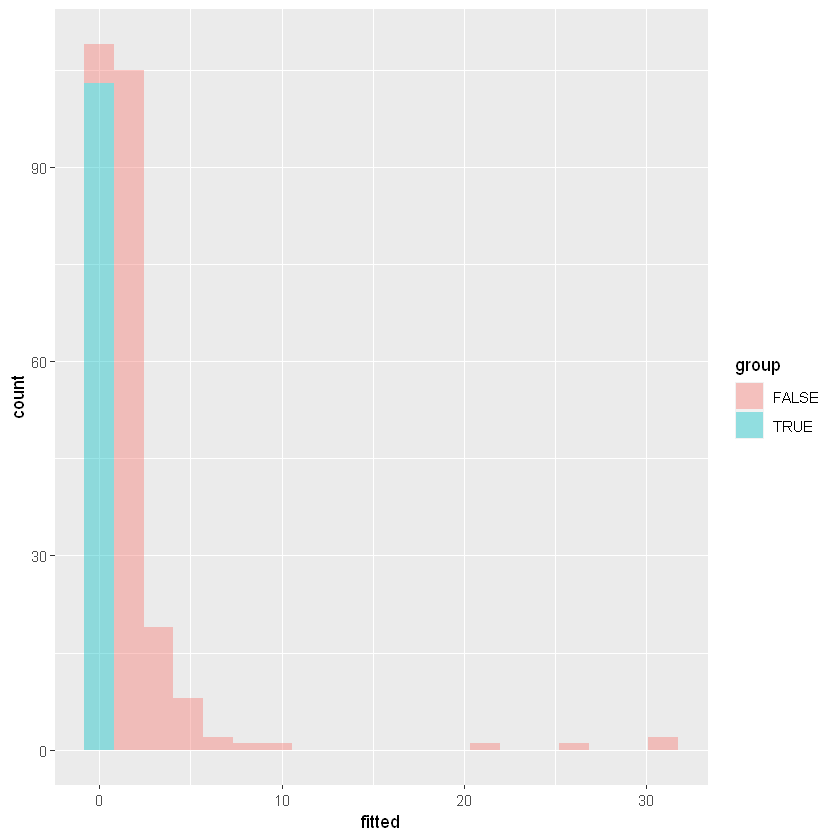

In [349]:
data %>% ggplot(aes(x= fitted , fill = group)) + 
    geom_histogram(alpha=0.4,bins=20)